## LGM Internship Task 2

Stock Market Prediction And Forecasting Using Stacked LSTM

#### In this task we will do stock market prediction using Stack LSTM

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


## Sorting data according to date

In [4]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, yearfirst=False) #Converting to date-time format in pandas for sorting in ascending order
dataAsc = data.sort_values(by='Date')
dataAsc

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [5]:
#Reset the index of our data
dataAsc.reset_index(inplace=True)
dataAsc.drop('index', axis='columns', inplace=True)
dataAsc

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


## Plotting Closing Data

To visualize the analysis of stock market we will plot the closing data

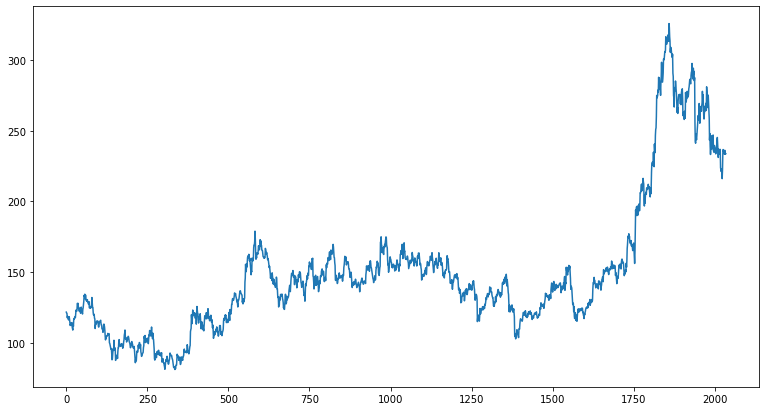

In [6]:
plt.figure(figsize=(13,7))
plt.plot(dataAsc['Close'])

## Checking for null values in data

In [7]:
dataAsc.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Luckily we don't have any missing values in our data so we are good to go and prepare the data

## Scaling the data

For giving the data to LSTM, first we need to scale the data between specific range which we generally keep from 0 to 1. We will do this with the help of minmax scaler from sklearn module

In [8]:
#First we will seperate the close column from our dataset and then scale it after converting it to numpy array
dataClose = dataAsc['Close']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataClose = scaler.fit_transform(np.array(dataClose).reshape(-1,1))
dataClose

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting data into train and test data

In [9]:
train_size = int(len(dataClose)*0.7)
train_data = dataClose[:train_size]
test_data = dataClose[train_size:]
print(len(train_data))
print(len(test_data))

1424
611


### Data preprocessing

In this we will create a function that will create our data to be ready to give to LSTM. In this we will take first 99 close values and give it as input and 100th value as output value for training and similarly we will do for 99 values from second value and give 101th value as output and so on we will keep increasing our starting value by 1. In simple words we suppose we want to find the price for 100th day then we will give 99 values before 100th value to the input and if we want the 105th day price then we will give 99 values before the 105th value to train and predict the output of 105th value.

In [10]:
def data_preprocess(data,ts):
    xdata, ydata = [], []
    for i in range(len(data)-ts-1):
        xdata.append(data[i:i+ts])
        ydata.append(data[i+ts])
    return np.array(xdata), np.array(ydata)

In [11]:
#We will 150 timesteps for training our model
xTrain, yTrain = data_preprocess(train_data, 150)
xTest, yTest = data_preprocess(test_data, 150)
print(xTrain.shape, yTrain.shape)

(1273, 150, 1) (1273, 1)


In [12]:
xTrain

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.08455882],
        [0.05535131],
        [0.0620915 ]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.05535131],
        [0.0620915 ],
        [0.06311275]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.0620915 ],
        [0.06311275],
        [0.05861928]],

       ...,

       [[0.14848856],
        [0.14460784],
        [0.15196078],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.14460784],
        [0.15196078],
        [0.15788399],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.15196078],
        [0.15788399],
        [0.13991013],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [13]:
yTrain

array([[0.06311275],
       [0.05861928],
       [0.02634804],
       ...,
       [0.15420752],
       [0.15012255],
       [0.15747549]])

## Creating LSTM Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [15]:
model = Sequential()
model.add(LSTM(70, return_sequences=True, input_shape=(150,1)))
model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.05)) #This will discard 5% of the neurons to prevent overfitting
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 70)           20160     
                                                                 
 lstm_1 (LSTM)               (None, 150, 60)           31440     
                                                                 
 dropout (Dropout)           (None, 150, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                22200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 73,851
Trainable params: 73,851
Non-trainable params: 0
_________________________________________________________________


## Training Our Data

In [16]:
model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 712ms/step - loss: 0.0096 - val_loss: 0.0114
Epoch 2/100
20/20 [==============================] - 12s 583ms/step - loss: 0.0018 - val_loss: 0.0062
Epoch 3/100
20/20 [==============================] - 12s 589ms/step - loss: 9.6737e-04 - val_loss: 0.0039
Epoch 4/100
20/20 [==============================] - 11s 571ms/step - loss: 9.3146e-04 - val_loss: 0.0038
Epoch 5/100
20/20 [==============================] - 12s 582ms/step - loss: 9.0204e-04 - val_loss: 0.0033
Epoch 6/100
20/20 [==============================] - 11s 557ms/step - loss: 8.3626e-04 - val_loss: 0.0034
Epoch 7/100
20/20 [==============================] - 12s 587ms/step - loss: 7.9864e-04 - val_loss: 0.0036
Epoch 8/100
20/20 [==============================] - 12s 585ms/step - loss: 7.9066e-04 - val_loss: 0.0038
Epoch 9/100
20/20 [==============================] - 12s 579ms/step - loss: 7.7104e-04 - val_loss: 0.0037
Epoch 10/100
20/20 [==============================] - 

20/20 [==============================] - 11s 575ms/step - loss: 1.6710e-04 - val_loss: 0.0010
Epoch 78/100
20/20 [==============================] - 11s 569ms/step - loss: 1.6903e-04 - val_loss: 9.7566e-04
Epoch 79/100
20/20 [==============================] - 11s 577ms/step - loss: 1.5223e-04 - val_loss: 0.0013
Epoch 80/100
20/20 [==============================] - 11s 576ms/step - loss: 1.6593e-04 - val_loss: 8.1712e-04
Epoch 81/100
20/20 [==============================] - 11s 563ms/step - loss: 1.5129e-04 - val_loss: 0.0015
Epoch 82/100
20/20 [==============================] - 11s 564ms/step - loss: 1.7596e-04 - val_loss: 0.0012
Epoch 83/100
20/20 [==============================] - 11s 559ms/step - loss: 1.6763e-04 - val_loss: 0.0020
Epoch 84/100
20/20 [==============================] - 11s 564ms/step - loss: 1.5274e-04 - val_loss: 5.6524e-04
Epoch 85/100
20/20 [==============================] - 10s 530ms/step - loss: 1.6030e-04 - val_loss: 0.0010
Epoch 86/100
20/20 [==================

## Predicting on Train and Test data

In [17]:
trainPred = model.predict(xTrain)
testPred = model.predict(xTest)

The above prediction is in the scaled form which we need to convert into original form.

In [18]:
trainPred = scaler.inverse_transform(trainPred)
testPred = scaler.inverse_transform(testPred)

We will now calculate root mean squared error on our predicted data and actual data

In [19]:
from sklearn.metrics import mean_squared_error
import math
rmseTrain = math.sqrt(mean_squared_error(yTrain,trainPred))
rmseTest = math.sqrt(mean_squared_error(yTest,testPred))
print("Train Rmse: ",rmseTrain," Test Rmse: ",rmseTest)

Train Rmse:  133.89060867351674  Test Rmse:  212.41988890749053


## Plotting the predictions

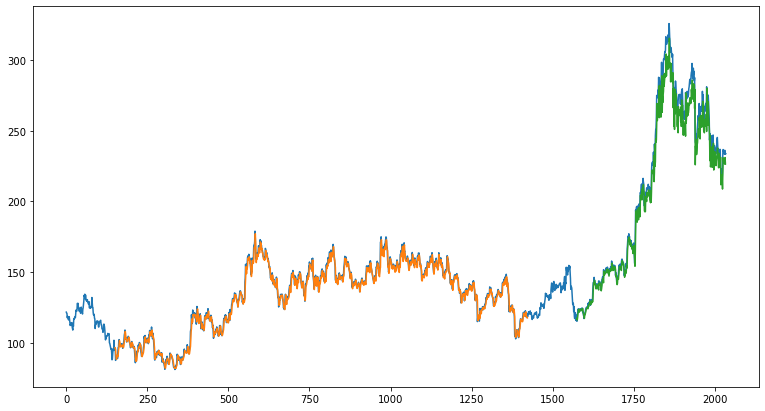

In [20]:
#Shifting predicted train data for plotting
trainPredPlt = np.empty_like(dataClose)
trainPredPlt[:,:] = np.nan
trainPredPlt[150:len(trainPred)+150,:] = trainPred

#Shifting predicted test data for plotting
testPredPlt = np.empty_like(dataClose)
testPredPlt[:,:] = np.nan
testPredPlt[300+len(trainPred)+1:len(dataClose)-1,:] = testPred

plt.figure(figsize=(13,7))
plt.plot(dataAsc['Close'])
plt.plot(trainPredPlt)
plt.plot(testPredPlt)

We can see our predicted data on trained data and test data on the original data are pretty close. This shows that our stacked LSTM model is performing well.

## Let us predict the closing price for the next day

In [21]:
dataClose.shape

(2035, 1)

In [26]:
futTrain = np.array(dataClose[1886:,:])
futTrain = np.append(futTrain,0)
futTrain.shape

(150,)

In [27]:
futTrain = futTrain.reshape(1,futTrain.shape[0],1)
futTrain.shape

(1, 150, 1)

In [28]:
futPred = model.predict(futTrain)

In [29]:
futPred = scaler.inverse_transform(futPred)
futPred

array([[90.19621]], dtype=float32)

Here We can see the closing price for next day is 90.196. In this way we can predict the data for future using Stacked LSTM Model.

## -By Hritik

# Thank You!